<a href="https://colab.research.google.com/github/ixwallac/Math-152/blob/main/Notebook_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 5:  Putting it together...

To wrap things up, we are going to bring together the techniques we have seen, and attempt a few challenges.

Please submit this notebook by 5pm (California time) on Wednesday, March 17th.  Your submission should include answers to all three questions from the first (Repetition and benchmarking) section, and **two** of the challenging problems.

## Repetition and benchmarking

Computers are very good at repetition.  As your programming skills improve, you can more easily coax your computer into performing more repetitions.  We have seen at least three ways of performing repetition:  with loops (e.g, for and while loops), with lists (especially slicing and comprehension), and with numpy arrays (especially vectorized functions).  

It is good to see this, in a simple example, to reflect on what you've learned this quarter.  Our simple example will be producing a list of squares $n^2$ for $n$ in a range of numbers.

The first things we learned were how to use Python as a calculator, printing "answers" to the screen, and using a "for loop" to repeat things.  Here is a bit of code in that spirit.

In [ ]:
for n in range(10):
  print(n*n)

0
1
4
9
16
25
36
49
64
81


Then we learned about lists.  Here are two ways to make a list of the squares, from $0^2$ up to $9^2$.  We print the list at the end of each code block.

In [ ]:
L = []
for n in range(10):
  L.append(n*n)
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [ ]:
L = [0]*10
for n in range(10):
  L[n] = n*n
print(L)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Hopefully you learned to give your lists better names, like `square_list`.  A very slick Pythonic way of producing a list is with "list comprehension".  Such an approach is in the code below.

In [ ]:
square_list = [n*n for n in range(10)]
print(square_list)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Finally, we learned about the numpy package, which pumps arrays through the processor very quickly.  A numpy approach is below.

In [1]:
import numpy as np # First we have to load the package.

In [ ]:
A = np.arange(10)
print(A*A)

[ 0  1  4  9 16 25 36 49 64 81]


Let's consider the question:  what is the fastest way to produce a list (or array) of squares?  To answer it, we will wrap things in different functions, and carry out some time analysis.  

Notice that the functions are as identical as possible.  The method of creating a list/array is the different in each function.  But all the functions take a single input `N` and return a list or array with the squares of 0,...,N-1.  Note that there are **no print statements**!  Printing takes time, and we don't care about how much time it takes to *print* a list on your screen.  Also, if we run %timeit, then a print statement will fill your screen with tens of thousands of printed messages!

In [ ]:
def make_sq_1(N):
  L = []
  for n in range(N):
    L.append(n*n)
  return L

In [ ]:
def make_sq_2(N):
  L = [0] * N
  for n in range(N):
    L[n] = n*n
  return L

In [ ]:
def make_sq_3(N):
  return [n*n for n in range(N)]

In [ ]:
def make_sq_4(N):
  A = np.arange(N)
  return A*A

In [ ]:
%timeit make_sq_1(1000)

10000 loops, best of 5: 99.6 µs per loop


In [ ]:
%timeit make_sq_2(1000)

10000 loops, best of 5: 76 µs per loop


In [ ]:
%timeit make_sq_3(1000)

10000 loops, best of 5: 62.1 µs per loop


In [ ]:
%timeit make_sq_4(1000)

The slowest run took 16.84 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.92 µs per loop


These benchmarks are useful, but let's do a graphical analysis.  This is the last thing we studied.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # In case we want some modern stylings.
import time as time

Now we are going to create a graph to benchmark the performance of these three functions.  This will use a few new programming techniques.

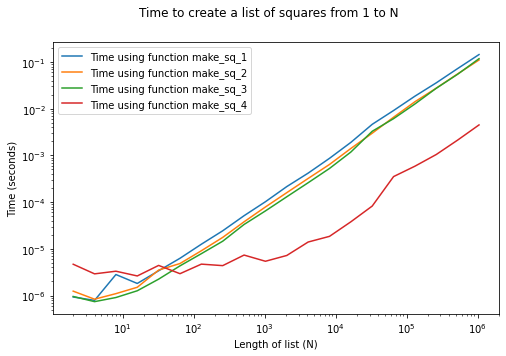

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,5)) # Initialize a plot.
N_array = np.array([2**n for n in range(1,21)]) # We'll try N in the array [2,4,8,..,~1 million]
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]: # A list of functions, oh my!
  time_array = np.zeros(len(N_array)) # Initialize an array of zeros
  for j,N in enumerate(N_array):  # See notes afterwards about the enumerate command.
    time_tot = 0
    for reps in range(10): # Average of 10 repetitions.
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.show()

Let's do a line-by-line analysis.

1.  `fig,ax = plt.subplots(1,1,figsize=(8,5))`

2.  `N_array = np.array([2**n for n in range(1,21)])`

3.  `for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4]:`

4.  `  time_array = np.zeros(len(N_array)) # Initialize an array of zeros`

5.  `  for j,N in enumerate(N_array):`

6.  `    time_tot = 0`
    `for reps in range(10):`
      `start_time = time.time()`
      `method(N)`
      `end_time = time.time()`
      `time_tot += end_time - start_time`
    `time_ave = time_tot / 10`

    `time_array[j] = time_ave`
7.    `plt.plot(N_array, time_array, label='Time using function '+method.__name__)`

8.  `plt.legend()`

9.  `plt.xscale('log')`
10. `plt.yscale('log')`

Line 1 initializes a plot, with figure size 8 inches by 5 inches.  The "1,1" means that the plot has no subplots, or more precisely, it is a 1 by 1 grid of plots.  (Only one plot).

In line 2, we use a list comprehension to make a list [2,4,8,16,..., 2^20].  Note that 2^20 is about one million.  These are the N's that we're going to work with.

Line 3 might be surprising and interesting.  The variable `method` is iterated through an array of four *functions*!  Yes, we can have a list of functions!  And then we can use those functions!  Functions are Python objects like any other, and they can be treated as such.

Lines 4-6 create an array of times.  Instead of using the %timeit magic, we store our times in an array, and we carry out a timing experiment from scratch.  Line 4 just initializes a numpy array of zeros to fill later.

Line 5 has a new command `enumerate` in the loop.  This makes `N` iterate through our `N_array`, and meanwhile `j` will simply "count up".  It's equivalent to setting `j=0` before the loop, and putting a `j = j + 1` within the loop to count.

Line 6 carries out the timing experiment.  It runs a function (`method`) to create a list of squares up to `N`.  It does this 10 times, checking the time before and after each time.  Then it computes the average amount of time elapsed (among the 10 repetitions) and records this in the `time_array`.

Line 7 plots `N` on the x-axis and time (`time_array`) on the y-axis with a line plot.  It assigns this plot a label, which is the name of the method.  To find the name of the function `method`, you can use `method.__name__`.  That's a bit fancier Python.

Finally, Line 8 produces the legend from the labels.  

Lines 9 and 10 make the x-axis and y-axis log-scaled, which is helpful since the variable `N` is increasing exponentially, and some times are as short as microseconds while others are closer to milliseconds or seconds.

The rest is styling.

## Exercises

1.  Interpret the plot above.  Which method is fastest for long lists?  Which method is fastest for short lists?  At what size `N` should you switch from one method to the other?

2.  Add another method to the plot, by defining your own function `make_sq_5` that mirros the basic structure of the other `make_sq` functions.  Note that your function must create the list in a different way, but it should still take the same parameter `N` and return a list or numpy array.  Create the plot with your function added to the other four, and compare the performance of your method to the others.

3.  Create a function with `def inflate(S):` which takes as input a string `S` and returns a string in which the 1st letter of `S` appears once, and the second letter appears twice, the third letter appears three times, etc.  For example, `inflate('Hello')` should return the string `'Heelllllllooooo'`.  You must use a loop of the form `for j,letter in enumerate(S):`, and *no other loops*!

### Solutions:

1. For short lists, the fastest method is `make_sq_3`. For a list of length 14 and greater, `make_sq_4` is the fastest. The only noticable place to switch from one to the other shown by the graph is at length 14.

2. Off the top of my head, I can't think of anything notably better than any of the previous `make_sq` functions without using the built in `square` function from numpy, which is identical to what is used in `make_sq_4`. For fun, I wanted to take the range and make a separate 2D array with that range on the diagonal and multiply the two, but that ended up using all the power available, so I have to do something less crazy. 

  I suppose a 1000000x1000000 array might be a little dangerous. I made `make_sq_6` just to goof off.

In [ ]:
def make_sq_5(N):
  A = np.arange(N)
  i = 0
  while i < N:
    A[i] = i**2
    i += 1
  return A

In [ ]:
make_sq_5(15)

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144,
       169, 196])

In [ ]:
def make_sq_6(N):
  A = np.arange(N)
  B = np.zeros((N,N))
  for n in A:
    B[n,n] = n
  return np.dot(A,B)

In [ ]:
make_sq_6(15)

array([  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.,
       121., 144., 169., 196.])

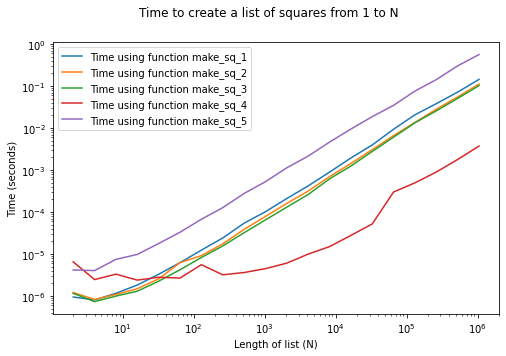

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,5)) # Initialize a plot.
N_array = np.array([2**n for n in range(1,21)]) # We'll try N in the array [2,4,8,..,~1 million]
for method in [make_sq_1, make_sq_2, make_sq_3, make_sq_4, make_sq_5]: # A list of functions, oh my!
  time_array = np.zeros(len(N_array)) # Initialize an array of zeros
  for j,N in enumerate(N_array):  # See notes afterwards about the enumerate command.
    time_tot = 0
    for reps in range(10): # Average of 10 repetitions.
      start_time = time.time()
      method(N)
      end_time = time.time()
      time_tot += end_time - start_time
    time_ave = time_tot / 10
    time_array[j] = time_ave
  plt.plot(N_array, time_array, label='Time using function '+method.__name__)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Time to create a list of squares from 1 to N')
plt.xlabel('Length of list (N)')
plt.ylabel('Time (seconds)')
plt.show()

Obviously, using a while loop and changing each slice individually isn't very fast. With my current knowledge, I'm not sure if I could optimize a function much more than `make_sq_4`.

3. No problem.

In [ ]:
#3
def inflate(S):
  orig = 'S'
  new = ''
  for j,letter in enumerate(S):
    new += (j+1)*letter
  return new

In [ ]:
inflate('Hello')

'Heelllllllooooo'

Put your solutions here.

# Final challenges!

Please turn in your notebooks with your attempts on **two** of the challenges below.  **Only two** will be graded.

# Challenge 1

If $N$ is a positive integer, then $r_3(N)$ is the number of ways that $N$ can be expressed as the sum of three squares.  Order and sign matter, so for example
$$6 = 1^2 + 1^2 + 2^2 = (-1)^2 + 1^2 + 2^2 = 2^2 + (-1)^2 + (-1)^2 = \cdots$$
These are all different ways of expressing 6 as the sum of three squares.  In fact, $r_3(6) = 8 \cdot 3 = 24$.  The 8 comes from the fact that there are eight sign-choices, and the 3 comes from the three orderings (1,1,2) and (1,2,1) and (2,1,1).

In other words, $r_3(N)$ is the number of elements in the following set:
$$\{ (a,b,c) \in {\mathbb Z}^3 : a^2 + b^2 + c^2 = N \}.$$

Write a function that computes $r_3(N)$ as efficiently as you can, for somewhat large values of $N$ (e.g., $N \approx 1000$).

You can check whether your function is behaving correctly, by comparing to the values found at the [Online Encyclopedia of Integer Sequences](https://oeis.org/A005875).




##Solution

### Explanation:

There doesn't appear to be an obvious way to quickly brute force the amount of ways it can be written, so I had to utilize a fancy counting technique. To me, this problem entails finding the amount of unique ways to pick out three elements from a set $L$ while *allowing* repetition. Since we're aiming for uniqueness, we only consider sequences that do not decrease. That is, if $b$ comes after $a$ in the sequence, then $a \leq b$.

Consider a list $L = \{0,1,\dots,n\}$ with $n \geq 2$. Note that $L$ has length $n+1$. If we want to find the amount of sequences we can pick from $L$ allowing repitition, we have three different options: a sequence with one distinct element, a sequence with two distinct elements, and a sequence with three distinct elements.

**One Distinct Element:** Let $a \in L$. Making a sequence with only $a$ would look like $(a,a,a)$. Since there are $n+1$ elements in $L$, the amount of sequences of this form is $n+1$.

**Two Distinct Elements:** Let $a,b \in L$ and, without loss of generality, say $a < b$. Let subscripts denote how often they appear in the sequence. There are $n+1 \choose 2$ ways to pick two distinct elements from the set. Furthermore, the ways $a$ and $b$ can be arranged without decreasing is $(a_1,b_2)$ and $(a_2,b_1)$. Otherwise, we would have $(a_3)$ or $(b_3)$ which have already been counted. So 2 arrangements of $a,b \in L$ and $n+1\choose 2$ ways to pick out 2 elements from $L$ gives us $2{n+1\choose2}$ sequences.

**Three Distinct Elements:** Let $a,b,c \in L$ and suppose without loss of generality that $a < b < c$. Then the only way we can arrange these while including all three is $(a_1,b_1,c_1)$. Furthermore, there are $n+1 \choose 3$ unique ways to pick three distinct elements from $L$. Therefore there are $n+1 \choose 3$ distinct sequences of this form.

In total, there are $n+1 + 2{n+1\choose2} + {n+1\choose3}$ unique non-decreasing sequences that we can create from $L$.

My function looks through sequences of the form $(x,y,z)$ and checks if $x^2 + y^2 + z^2 = N$. If so, it checks how many values are nonzero, how many of the values are equal, and which values are equal and adds to the total $R$ accordingly.

### Code:

In [ ]:
from math import factorial
def choose(a,b): # "a choose b"
  return int(factorial(a)/(factorial(b)*factorial(a-b)))

def combo_thing(N): # Specifically for the following function
  if N == 0:
    return 1 # Only one sequence made from an input of 0
  elif N == 1 or N == 2 or N == 3:
    return 4 # Inputs of 1, 2, or 3 should only consider sequences with 0's and 1's, since 2^2 = 4
  else:
    A = int(np.sqrt(N)+1) #  We want sequence entries up to the square root of N
  return A + 2*choose(A,2) + choose(A,3)

Note that, since we're dealing with squares here, the biggest value of $x$, $y$, or $z$ that we'll need is $\lfloor\sqrt{N}\rfloor$. This dramatically shortens the amount of sequences python has to check. That being said, for $N = 0$, we'll only need to look at 1 sequence, and since $\lfloor\sqrt{1}\rfloor = \lfloor\sqrt{2}\rfloor = \lfloor\sqrt{3}\rfloor$, we only need to look at 4 lists for $N = 1,2,3$.

The function below checks if $a^2 + b^2 + c^2 = N$ for a sequence $(a,b,c)$. If so, it checks what kind of sequence it is and adds to $R$ accordingly.

In [ ]:
def rep_three(N):
  R = 0
  length = combo_thing(N) # Amount of our non-decreasing sequences with entries up to root N
  bigarray = np.array([[0,0,0]]*length) # 2D zero-array of length "length"
  row = 0 # Row counter
  for x in range(int(np.sqrt(N))+1): # Filling in the zero-entries with non-decreasing lists
    for y in range(x+1): # Second entry less than or equal to the third
      for z in range(y+1): # First entry less than or equal to the second
        bigarray[row] = [z,y,x]
        row += 1

  for n in range(length):
    if np.sum(np.square(bigarray[n])) == N: # Checking the sequences
      if (bigarray[n,0] == 0) and (bigarray[n,1] == 0) and (bigarray[n,2] == 0): # If all zeros, no variations
        R += 1
      elif (bigarray[n,0] == 0) and (bigarray[n,1] == 0) and (bigarray[n,2] != 0): # If one nonzero, 3 position options and 2 sign options
        R += 6
      elif (bigarray[n,0] == 0) and (bigarray[n,1] != 0) and (bigarray[n,2] != 0): # If two nonzero, two options
        if bigarray[n,1] == bigarray[n,2]: # If nonzero entries are equal, switching their places changes nothing - 3 position options and 4 sign options
          R += 12
        else: # 6 position options and 4 sign options
          R += 24
      elif (bigarray[n,0] != 0) and (bigarray[n,1] != 0) and (bigarray[n,2] != 0): # All three entries nonzero
        if bigarray[n,0] == bigarray[n,1] == bigarray[n,2]: # If all equal, 1 position option and 8 sign options
          R += 8
        elif bigarray[n,0] == bigarray[n,1]: # If two are equal, 3 position options and 8 sign options
          R += 24
        elif bigarray[n,0] == bigarray[n,2]:
          R += 24
        elif bigarray[n,1] == bigarray[n,2]:
          R += 24
        else: # If none are equal, 6 position options and 8 sign options
          R += 48
  return R # The result of your function should be R.

Now I'd like to compare the values from 0 to 74 to the list given by the website linked to us.

In [ ]:
my_list = [] # Creating a list using my function
for n in range(75):
  my_list.append(rep_three(n))

website_list = [1,6,12,8,6,24,24,0,12,30,24,24,8,24,48,0,6,48,36,
 24,24,48,24,0,24,30,72,32,0,72,48,0,12,48,48,48,
 30,24,72,0,24,96,48,24,24,72,48,0,8,54,84,48,24,
 72,96,0,48,48,24,72,0,72,96,0,6,96,96,24,48,96,48,
 0,36,48,120] # List of outputs copied from the website

my_list == website_list # If True, that means it worked.

True

Nice. Now to time it for a large-ish input.

In [ ]:
%timeit rep_three(1000) # I think I got it working pretty quickly for what it is.

10 loops, best of 5: 46.3 ms per loop


# Challenge 2

If $r$ is a positive real number, then the area of the circle of radius $r$ is $\pi r^2$.  If you place this circle around the origin, on a sheet of graph paper, then you will find *about* $\pi r^2$ "grid points" inside this circle.  The grid points inside the circle form the set
$$S = \{ (x,y) \in {\mathbb Z}^2 : x^2 + y^2 < r^2 \}.$$

Define $E(r) = \pi r^2 - \# S$ to be the "error" -- the difference between the area of the circle and the number of grid points within the circle.  

Create a plot with $r$ on the horizontal axis and $E(r)$ on the y-axis.  Try to accomplish this as efficiently as possible, where $r$ ranges from $0$ to $1000$.

Can you come up with a good bound $\vert E(r) \vert \leq f(r)$ for some nice function $f(r)$, just by looking at your plot?  I.e., your plot of $E(r)$ should be bounded above by the graph of $y = f(r)$ and below by the graph of $y = -f(r)$.  If you can come up with such a bound, plot it too.

# Challenge 3

The following result was found by Euler, but I've changed his numbers to $A$ and $B$ to make your life hard.

Theorem:  A prime number $p$ can be expressed in the form $x^2 + 3 y^2$ if and only if $p$ is congruent to $A$ modulo $B$ (i.e., `p % B == A`).  

Use experimental techniques to determine $A$ and $B$.  Now try the same for $3$ replaced by $4,5,6,7,8,9$. 

# Challenge 4

Pascal's triangle has $1$ in the first row, then $1, 1$ in the second row, then $1,2,1$ in the third row, etc.  One can place these numbers in a triangle, with "rows" as diagonals, as drawn below.

1 1 1 1 1 1

1 2 3 4 5

1 3 6 10

1 4 10

1 5

1

Et cetera.

Turn these numbers into black and white dots, depending on whether they are even (black) or odd (white).  This produces an image like the following:

X X X X X X

X O X O X

X X O O

X O O

X X

X

Now perform this in PIL, to create an image that fills the top-left triangle in an image of at least 200 x 200 pixels.  You should *not* be computing giant numbers like 200 factorial!  Each row of Pascal's triangle can be computed from the previous by addition... and you can perform this "mod 2" all the way through.

Extra fun:  instead of black/white dots for even/odd, try colors based on remainders after dividing by three, by four, etc.


## Solution

### Explanation:

I wrote a function that produces Pascal's triangle "mod n" for an input `n`. It starts with a 1024x1024x3 array containing arrays of length 3 to accommodate for rgb values. Each value in an entry-array are equal to each other so that the entry-array represents an entry in Pascal's triangle. For outputs produced, I wrote algorithms that look through the values of the array and assigns pre-determined colors to different remainders.

### Code:

In [ ]:
from PIL import Image

In [ ]:
def pascal_mod(n):
  divisor = n
  pascal = np.zeros((1024,1024,3), dtype=np.uint8)
  for k in range(1024): # Prepping the "legs" of the triangle with 1's
    pascal[k,0] = [1,1,1]
    pascal[0,k] = [1,1,1]
  for x in range(1,1024):
    for y in range(1,1024):
      pascal[y,x] = (pascal[y-1,x] + pascal[y,x-1])%divisor # Sum of the remainders = remainder of the sum!
  return pascal

Note that any entry of `[0,0,0]` stays that way, so once we produce an image, the black space represents the stuff divisible by `n`.

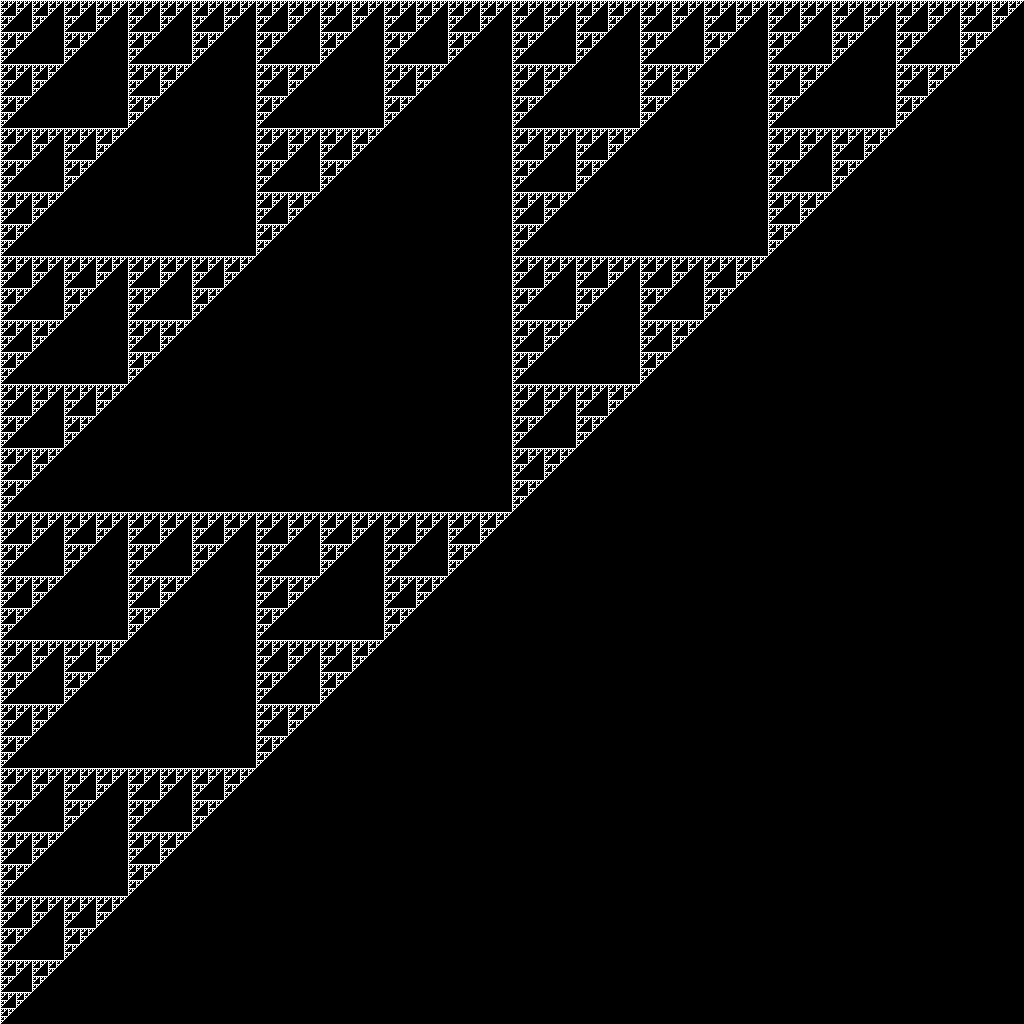

In [ ]:
sierpinski = pascal_mod(2) # Something approximating the Sierpinski triangle, at least
for c in range(1024):
  for r in range(1024-c): # Only want the top-left half of the image.
    if sierpinski[r,c,0] == 1: # Since each entry-array is composed of the same number, it just checks the first entry
      sierpinski[r,c] = [255,255,255] # 1's get colored white

display(Image.fromarray(sierpinski))

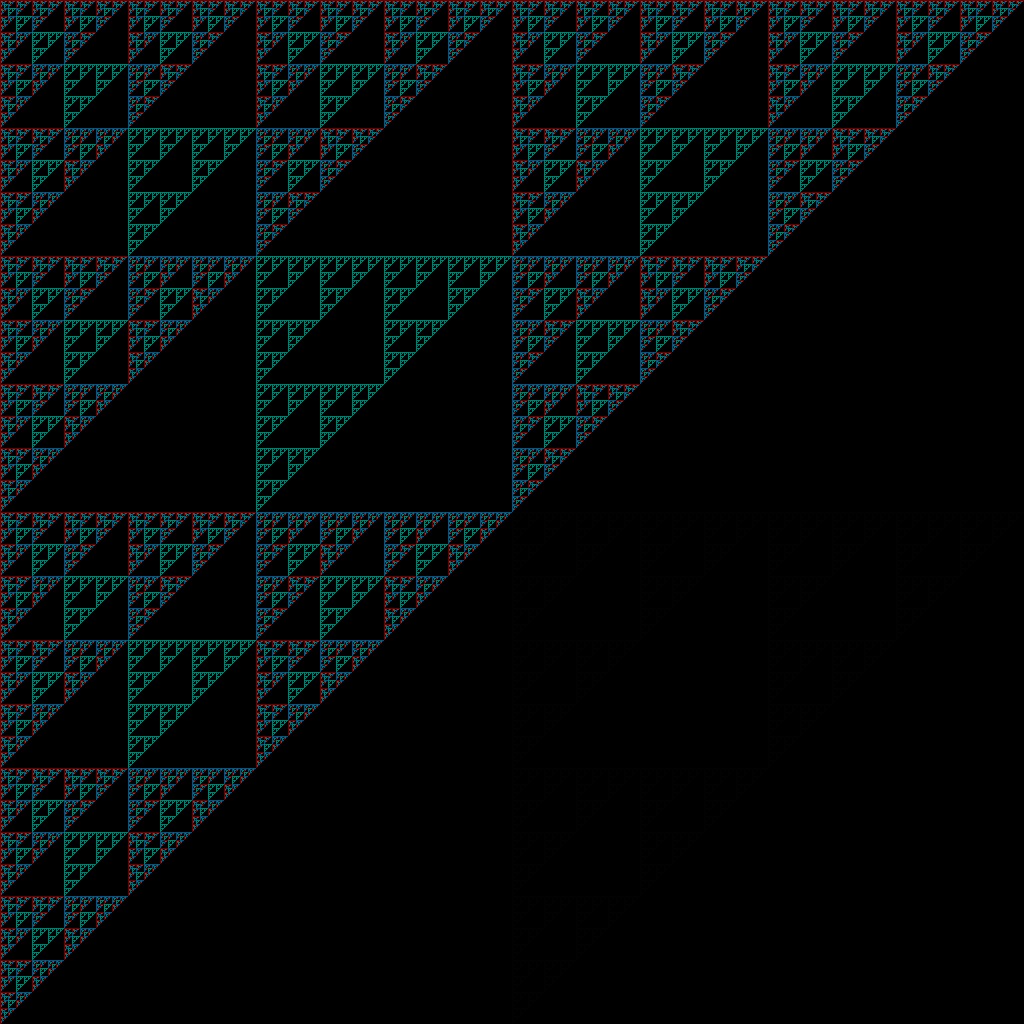

In [ ]:
mod4 = pascal_mod(4) # Let's see what happens mod 4
for c in range(1024):
  for r in range(1024-c):
    if mod4[r,c,0] == 1:
      mod4[r,c] = [96,5,5] # Remainder 1 gets colored red-ish
    elif mod4[r,c,0] == 2:
      mod4[r,c] = [4,126,111] # Remainder 2 gets colored green-ish
    elif mod4[r,c,0] == 3:
      mod4[r,c] = [10,85,122] # Remainder 3 gets colored blue-ish

mod4triangle = Image.fromarray(mod4)
display(mod4triangle)

A surprising amount is congruent to 2 mod 4. Also, it looks like the mostly red and blue parts are forming the same figure as the first one, with the green section sort of filling in the spaces.

The green sections like to be clustered together since $2 + 2 = 4 \equiv 0 \ \text{mod} \ 4$. The rest is a mix of blue, red, and green since $1 + 2 = 3 \equiv 3 \ \text{mod} \ 4$, $3 + 2 = 5 \equiv 1 \ \text{mod} \ 4$, $ 1 + 3 = 4 \equiv 0 \ \text{mod} \ 4$. and $1 + 1 \equiv 2 \ \text{mod} \ 4 \equiv 6 \ \text{mod} \ 4 \equiv 3 + 3$.

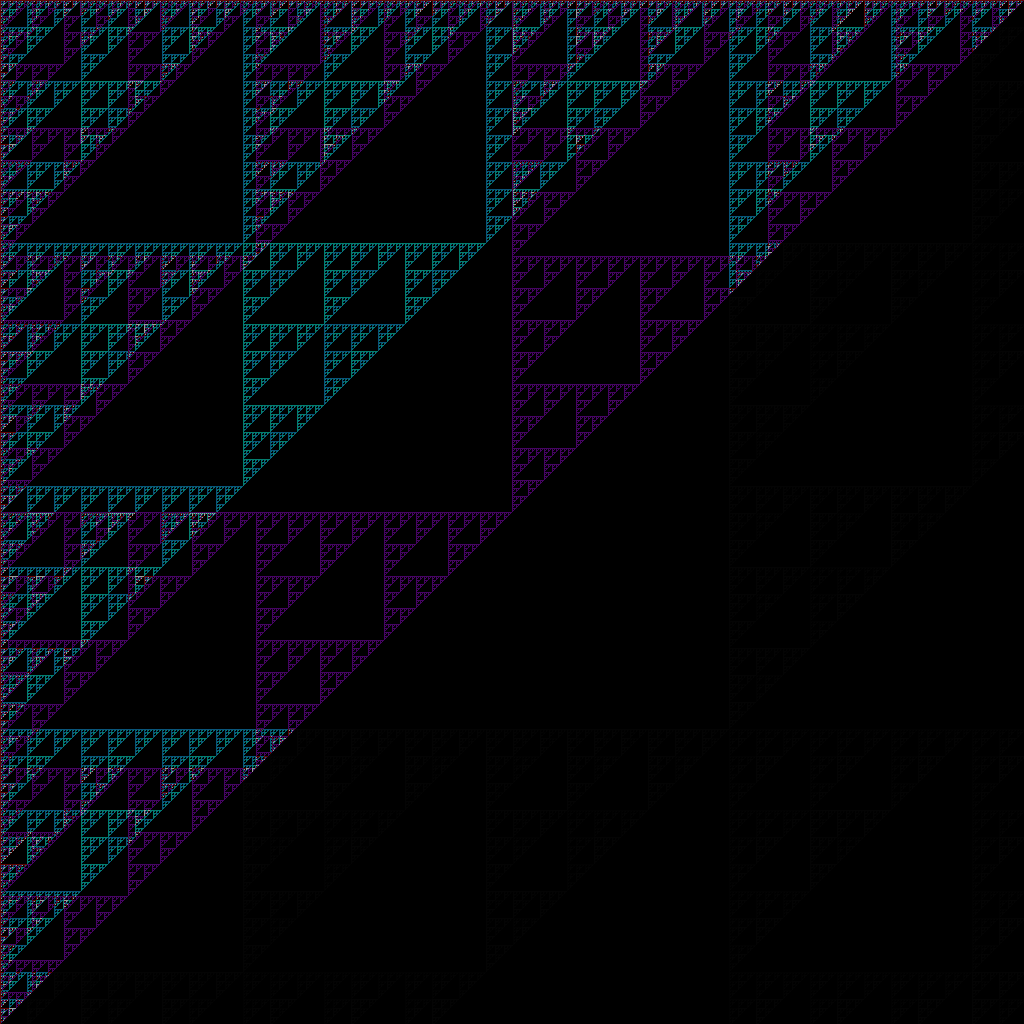

In [ ]:
mod6 = pascal_mod(6) # Let's try mod 6
for c in range(1024):
  for r in range(1024-c):
    if mod6[r,c,0] == 1:
      mod6[r,c] = [96,5,5] # Remainder 1 gets colored red-ish
    elif mod6[r,c,0] == 2:
      mod6[r,c] = [4,126,111] # Remainder 2 gets colored green-ish
    elif mod6[r,c,0] == 3:
      mod6[r,c] = [70,4,99] # Remainder 3 gets colored purple-ish
    elif mod6[r,c,0] == 4:
      mod6[r,c] = [10,85,122] # Remainder 4 gets colored blue-ish
    elif mod6[r,c,0] == 5:
      mod6[r,c] = [155,155,155] # Remainder 5 gets colored grey

mod6triangle = Image.fromarray(mod6)
display(mod6triangle) 

This one is particularly interesting. It looks like the $3 \ \text{mod}\ 6$ section is sort of shifted off of the rest, and any overlap is made up of a mixture of red or grey, so $1 \ \text{mod} \ 6$ or $5 \ \text{mod} \ 6$. This seems like a particularly good depiction of modular arithmetic in action.

$2+2 = 4 = 4 \ \text{mod} \ 6$, $4 + 4 = 8 = 2 \ \text{mod} \ 6$, and $4 + 2 = 6 = 0 \ \text{mod} \ 6$, which explains the green and blue sections. The edges are red because $1$ is assigned to be red. The purple section looks notably similar to the white one at the beginning, because $3 + 3 = 6 = 0 \ \text{mod} \ 6$, that is, it has a similar behavior. Anywhere where a green or blue pixel is across from a purple pixel will yield a grey or red pixel because $2 + 3 = 5 = 5 \ \text{mod} \ 6$ and $4 + 3 = 7 = 1 \ \text{mod} \ 6$, which explains the overlapping sections.

# Challenge 5

Often when visualizing time-series data, it makes sense to look not at day-by-day changes, but rather at a 7-day rolling average.  For example, when looking at Covid-19 cases, there are reporting fluctuations from day to day, so instead it is usually better to look at the average number of cases over the previous 7 days.

Write a function `def rolling(A, window=7):` which takes as input a one-dimensional numpy array `A`, and a parameter `window` whose default value is `7`.  The function must return an array `R` whose length is shorter than the length of `A`.  The entry `R[j]` should be the **average** of `A[j]`, `A[j+1]`, etc., up to `A[j+window-1]`.  

Then use this function and matplotlib to produce a plot:  a line plot of the array `A` produced below, and a line plot of the 7-day rolling average `R` produced by your function.  These plots should be on the same figure, and clearly labeled.


In [ ]:
# Here is the code to produce your test array A.
# Please use this array in your plot!

x_array = np.arange(300)
A = 5*(x_array/200)**2
A = A + np.random.random(len(A))

In [ ]:
# Please use this code to import matplotlib.
import matplotlib.pyplot as plt

In [ ]:
# Here is a plot of the array, to get you started.  
plt.plot(x_array, A)

# Now it's time to write your function to produce the 7-day rolling average, add it to the plot, and make everything clear and labeled.